# 📘 Dose-Response Curves: Drug Efficacy and IC50 Determination> Fit Hill equation to dose-response data and determine IC50 values⏱️ **15-25 minutes** | 📊 **Level: ●●○ Intermediate** | 🏷️ **Biology** | 🔬 **Pharmacology**---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/imewei/NLSQ/blob/main/examples/notebooks/04_gallery/biology/dose_response.ipynb)


In [1]:
# @title Install NLSQ (run once in Colab)
import sys

if 'google.colab' in sys.modules:
    print("Running in Google Colab - installing NLSQ...")
    !pip install -q nlsq
    print("✅ NLSQ installed successfully!")
else:
    print("Not running in Colab - assuming NLSQ is already installed")

Not running in Colab - assuming NLSQ is already installed


## 🔬 Domain Background**Biology System:** Drug response with sigmoidal dose-response relationship**Model Equation:**$$Response = \frac{E_{max}}{1 + (IC_{50}/[Drug])^n}$$**Where:**- $E_{max}$: Maximum effect (100% inhibition)- $IC_{50}$: Half-maximal inhibitory concentration- $n$: Hill coefficient (cooperativity)- $[Drug]$: Drug concentration**Common applications:**- 💊 **Drug screening** - Potency determination- 🧪 **Toxicology** - LD50 measurements- 🔬 **Enzyme inhibition** - Competitive inhibitors- 📊 **Receptor binding** - Affinity studies---

## 🎯 What You'll Learn- ✓ Fit Hill equation to dose-response data- ✓ Determine IC50 with confidence intervals- ✓ Interpret Hill coefficient (cooperativity)- ✓ Compare drug potencies---

## 📊 Parameter Interpretation Guide| Parameter | Meaning | Typical Range | Units ||-----------|---------|---------------|-------|| $E_{max}$ | Max inhibition | 90-100 | % || $IC_{50}$ | Half-max concentration | nM-mM | Molar || $n$ | Hill coefficient | 0.5-3.0 | - |**Derived quantities:**- **EC50:** Effective concentration for 50% response- **Potency ratio:** IC50(drug A) / IC50(drug B)---

## Setup

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
# MUST come before importing matplotlib
%matplotlib inline

In [3]:
from IPython.display import display

In [4]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

from nlsq import curve_fit


def hill_equation(concentration, Emax, IC50, n):
    """Hill equation for dose-response"""
    return Emax / (1 + (IC50 / concentration)**n)

print("✅ Hill equation defined")

✅ Hill equation defined


## Generate Dose-Response Data

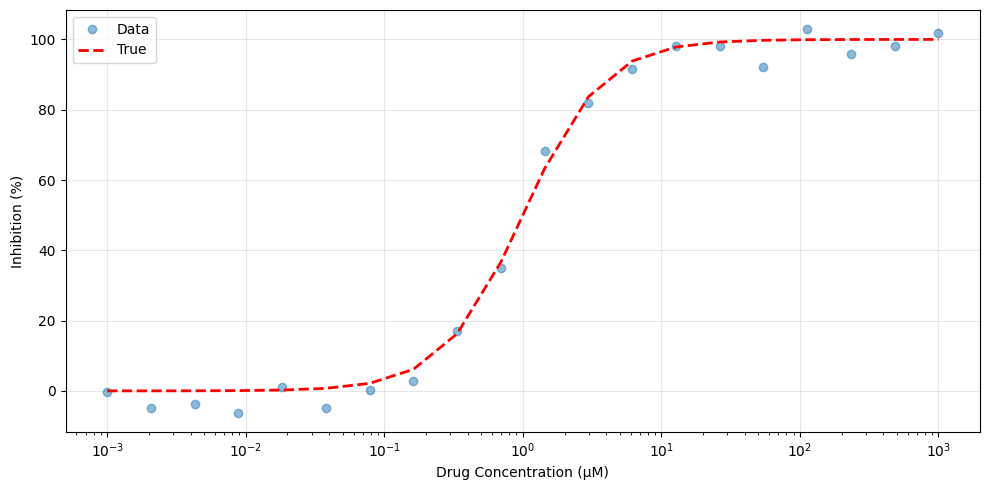

In [5]:
# True parameters
Emax_true, IC50_true, n_true = 100, 1e-6, 1.5  # IC50 in M

# Concentration range (log scale)
conc = np.logspace(-9, -3, 20)  # 1 nM to 1 mM
response_true = hill_equation(conc, Emax_true, IC50_true, n_true)
response = response_true + np.random.normal(0, 3, len(conc))

fig = plt.figure(figsize=(10, 5))
plt.semilogx(conc*1e6, response, "o", alpha=0.5, label="Data")  # Convert to µM
plt.semilogx(conc*1e6, response_true, "r--", label="True", linewidth=2)
plt.xlabel("Drug Concentration (µM)")
plt.ylabel("Inhibition (%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.tight_layout()
plt.show()


## Fit Hill Equation

In [6]:
# Initial guess
p0 = [95, 1e-6, 1.0]
bounds = ([50, 1e-10, 0.3], [105, 1e-3, 5.0])

popt, pcov = curve_fit(
    hill_equation, conc, response,
    p0=p0, bounds=bounds)

Emax_fit, IC50_fit, n_fit = popt
perr = np.sqrt(np.diag(pcov))

print("Fitted Parameters:")
print(f"  Emax:  {Emax_fit:.1f} ± {perr[0]:.1f} %")
print(f"  IC50:  {IC50_fit*1e6:.3f} ± {perr[1]*1e6:.3f} µM")
print(f"  Hill n: {n_fit:.2f} ± {perr[2]:.2f}")

if n_fit > 1.5:
    print("\n→ Positive cooperativity (n > 1)")

INFO:nlsq.curve_fit:Starting curve fit n_params=3 | n_data_points=20 | method=trf | solver=auto | batch_size=None | has_bounds=True | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=2.420664s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=6 | final_cost=112.2862 | elapsed=2.421s | final_gradient_norm=0.3091


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=3.246329s


INFO:nlsq.curve_fit:Curve fit completed total_time=3.2463 | final_cost=224.5723 | covariance_warning=False


Fitted Parameters:
  Emax:  98.1 ± 1.4 %
  IC50:  0.955 ± 0.063 µM
  Hill n: 1.63 ± 0.15

→ Positive cooperativity (n > 1)


## Visualize Fit

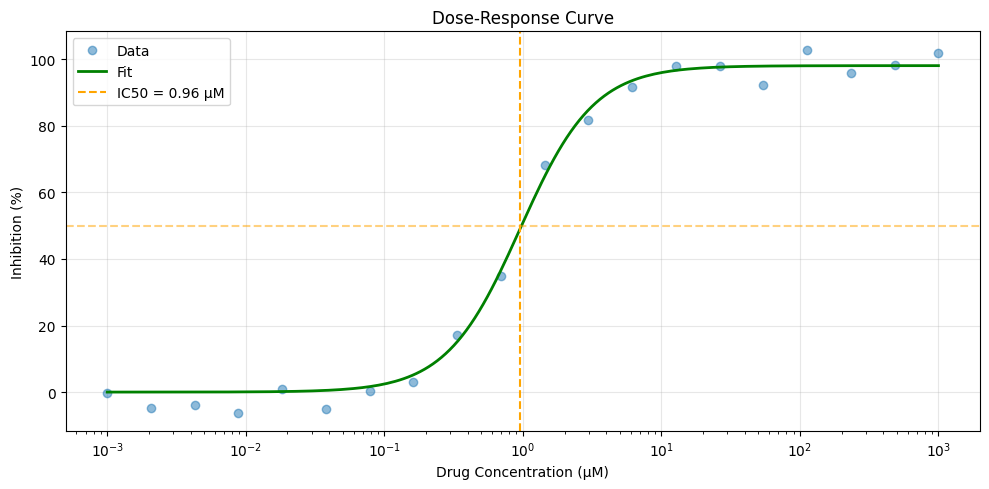

In [7]:
conc_fine = np.logspace(-9, -3, 200)
response_fit = hill_equation(conc_fine, *popt)

fig = plt.figure(figsize=(10, 5))
plt.semilogx(conc*1e6, response, "o", alpha=0.5, label="Data")
plt.semilogx(conc_fine*1e6, response_fit, "g-", linewidth=2, label="Fit")
plt.axhline(50, color="orange", linestyle="--", alpha=0.5)
plt.axvline(IC50_fit*1e6, color="orange", linestyle="--",
            label=f"IC50 = {IC50_fit*1e6:.2f} µM")
plt.xlabel("Drug Concentration (µM)")
plt.ylabel("Inhibition (%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.title("Dose-Response Curve")
plt.tight_layout()
plt.tight_layout()
plt.show()


## 🔑 Key Insights1. **IC50 is key metric** for drug potency comparison2. **Hill coefficient indicates cooperativity** - n>1 suggests multiple binding sites3. **Log scale essential** for wide concentration ranges---

## ⚠️ Domain-Specific Considerations**Partial agonists:** May not reach 100% response- **Solution:** Allow Emax to vary freely**Biphasic curves:** Multiple receptor types- **Solution:** Use sum of two Hill equations---

## 📚 Related Techniques- [Enzyme Kinetics](enzyme_kinetics.ipynb) - Michaelis-Menten- [Growth Curves](growth_curves.ipynb) - Similar sigmoidal shape---

## ❓ Domain-Specific Questions**Q: What does Hill coefficient n tell me?**A: n=1 (no cooperativity), n>1 (positive cooperativity), n<1 (negative cooperativity)**Q: How to compare drug potencies?**A: Lower IC50 = more potent. Drug A with IC50=1µM is 10x more potent than Drug B with IC50=10µM---

## 📚 Glossary**IC50:** Concentration causing 50% inhibition**Hill coefficient:** Measure of binding cooperativity**Cooperativity:** Multiple binding sites influencing each other---